In [296]:
import pandas as pd

import numpy as np
from numpy import arange
from sklearn.linear_model import LinearRegression

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
import pyreadr
from mpl_toolkits.mplot3d import Axes3D

import country_converter as coco
cc = coco.CountryConverter()

In [297]:
TWWI = pd.read_csv("DOT/TWWI.csv").replace(0, np.nan).dropna()
TWWI
####TRADE WEIGHTED WORLD INCOME!!!!!

,Country,Year,TWWI
23,Latvia,1994,8.524450e+06
24,Latvia,1995,2.952616e+07
25,Latvia,1996,4.330110e+07
26,Latvia,1997,2.371951e+09
27,Latvia,1998,2.767290e+09
...,...,...,...
8480,Algeria,2014,1.662856e+11
8481,Algeria,2015,1.692540e+11
8482,Algeria,2016,1.518059e+11
8483,Algeria,2017,1.285520e+11


In [298]:
tfp = pd.read_csv("tfp-at-constant-national-prices-20111.csv")
tfp = tfp.rename(columns = {"Entity" : "Country"})
tfp = tfp.replace({'United States' : 'USA'}).rename(columns = {"Total factor productivity index (using national accounts) (2017=1)" : "TFP"})
tfp["TFP"] = tfp["TFP"]*100

In [299]:
tfp["Country"] = cc.convert(names = tfp['Country'], to = "name_short")

In [300]:
pwt = pd.read_excel("pwt100.xlsx", sheet_name = "Data")[["country", "year", "ctfp", "cwtfp", "rtfpna", "rwtfpna"]]

#ctfp	TFP level at current PPPs (USA=1)
#cwtfp	Welfare-relevant TFP levels at current PPPs (USA=1)
#rtfpna	TFP at constant national prices (2017=1)
#rwtfpna	Welfare-relevant TFP at constant national prices (2017=1)

In [301]:
pwt = (pwt
    .rename(columns = {"country" : "Country", "year" : "Year", "rtfpna" : "TFP", "ctfp" : "CTFP", "cwtfp" : "CWTFP", "rwtfpna" : "WTFP"})
    .replace({'United States' : 'USA'}))

pwt[["CTFP", "CWTFP", "TFP", "WTFP"]]= pwt[["CTFP", "CWTFP", "TFP", "WTFP"]] * 100

##Removing USA as value always == 1
v = pwt[pwt["Country"] == "USA"]
v[["ctfp", "cwtfp"]] = np.nan
pwt[pwt["Country"] == "USA"] = v
pwt["Country"] = cc.convert(names = pwt['Country'], to = "name_short")
pwt[pwt["Country"] == "USA"].head(10)

C:\Users\joshu\AppData\Local\Temp\ipykernel_9864\142776407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v[["ctfp", "cwtfp"]] = np.nan
C:\Users\joshu\AppData\Local\Temp\ipykernel_9864\142776407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v[["ctfp", "cwtfp"]] = np.nan
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of 

,Country,Year,CTFP,CWTFP,TFP,WTFP


In [302]:
WID_Data = pd.read_excel("WID_Data.xlsx", sheet_name = "Data")
WID_Data[WID_Data['Year'] == 2015].head(20)

,Percentile,Year,gptinc_992_j_CH\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSwitzerland,gptinc_992_j_QM\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nEastern Europe,gptinc_992_j_UY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nUruguay,gptinc_992_j_SY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSyrian Arab Republic,gptinc_992_j_GN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nGuinea,gptinc_992_j_OE-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nOther MENA (at market exchange rate),gptinc_992_j_MW\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMalawi,gptinc_992_j_MN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMongolia,...,sptinc_992_j_SN\nPre-tax national income \nBottom 50% | share | adults | equal split\nSenegal,sptinc_992_j_MG\nPre-tax national income \nBottom 50% | share | adults | equal split\nMadagascar,sptinc_992_j_CD\nPre-tax national income \nBottom 50% | share | adults | equal split\nDR Congo,sptinc_992_j_PL\nPre-tax national income \nBottom 50% | share | adults | equal split\nPoland,sptinc_992_j_EE\nPre-tax national income \nBottom 50% | share | adults | equal split\nEstonia,sptinc_992_j_QT-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nSouth Africa (at market exchange rate),sptinc_992_j_PG\nPre-tax national income \nBottom 50% | share | adults | equal split\nPapua New Guinea,sptinc_992_j_QO-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nNorth Africa (at market exchange rate),sptinc_992_j_QF-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nOceania (at market exchange rate),sptinc_992_j_ID\nPre-tax national income \nBottom 50% | share | adults | equal split\nIndonesia
65,pall,2015,0.432388,0.501557,0.540364,0.651422,0.538078,0.726932,0.651527,0.559097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,p0p50,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1338,0.1248,0.1264,0.1984,0.1729,0.0581,0.1297,0.1327,0.1171,0.1475
209,p50p90,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3891,0.3676,0.3852,0.4238,0.4692,0.2879,0.4082,0.3860,0.5114,0.4028
281,p90p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4771,0.5076,0.4884,0.3778,0.3579,0.6540,0.4621,0.4813,0.3714,0.4497
353,p99p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1318,0.1517,0.1463,0.1491,0.1114,0.1938,0.1628,0.1690,0.1296,0.1808


In [303]:
WID_G = WID_Data.iloc[:, 0:250]
WID_G = WID_G[WID_G.Percentile == 'pall'].drop(['Percentile'], axis = 1)

In [304]:
WID_G1 = WID_G
WID_G1 = WID_G1.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="Gini")

In [305]:
WID_G2 = WID_G1
WID_G2['Country'] = WID_G2['Country'].str.split('\n').str[3]
WID_G2 = WID_G2.replace({'Russian Federation' : 'Russia'})
WID_G2['Gini'] = WID_G2["Gini"]########################################################

In [306]:
WID_G2['Gini'].describe()

count    10584.000000
mean         0.580033
std          0.106081
min          0.208031
25%          0.499880
50%          0.593025
75%          0.651422
max          0.946778
Name: Gini, dtype: float64

In [307]:
#tfp_gini = pd.concat([tfp, WID_G2], axis=1, join="inner")
WID_G2["Country"] = cc.convert(names = WID_G2['Country'], to = "name_short")
tfp_gini = pwt.merge(WID_G2, on = ['Country', 'Year'], how="outer")
tfp_gini = tfp_gini[tfp_gini["Country"] != "South Africa"] ## Why is SA in the dataset twice

Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex


Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe

In [308]:
swiid = pd.read_csv("swiid9_5\swiid9_5_summary.csv").replace(0,np.nan)

In [309]:
swiid = swiid.rename(columns = {'country' : 'Country', 'year': 'Year'})
swiid['Year'] = swiid['Year'].astype(int)
swiid.abs_red = swiid.gini_mkt - swiid.gini_disp
tfp_gini = tfp_gini.merge(swiid, on=['Country', 'Year'], how='outer')
tfp_gini

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,gini_mkt_se,abs_red,abs_red_se,rel_red,rel_red_se
0,Aruba,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,Yugoslavia,1986,NaN,NaN,NaN,NaN,NaN,33.9,3.10,47.2,7.20,13.3,NaN,NaN,NaN
19453,Yugoslavia,1987,NaN,NaN,NaN,NaN,NaN,34.2,3.11,47.3,7.22,13.1,NaN,NaN,NaN
19454,Yugoslavia,1988,NaN,NaN,NaN,NaN,NaN,34.5,3.13,47.5,7.24,13.0,NaN,NaN,NaN
19455,Yugoslavia,1989,NaN,NaN,NaN,NaN,NaN,34.7,3.12,47.6,7.25,12.9,NaN,NaN,NaN


In [310]:
### Choosing Measure of gini
tfp_gini['WIID'] = tfp_gini['Gini']
tfp_gini['Gini'] = tfp_gini['gini_mkt']

In [ ]:
"""
## IV
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)
X = TGall[["lnGDPPC", "Gini"]].dropna(axis=0)
model = linear_model.LinearRegression()
reg = model.fit(X[['lnGDPPC']], X['Gini'])
print(model.coef_[0])
"""

In [311]:
# Normalize Gini Coefficient
#tfp_gini["NGini"] = np.nan
tfp_gini["-Gini"] = np.nan
tfp_gini["dGini"] = np.nan
tfp_gini["d5Gini"] = np.nan
tfp_gini["dpGini"] = np.nan
tfp_gini["d5pGini"] = np.nan
tfp_gini["dNGini"] = np.nan
tfp_gini["dpGinim5"] = np.nan
tfp_gini["Ginim5"] = np.nan

# Find the changes tfp and gini
tfp_gini["dTFP"] = np.nan
tfp_gini["dpTFP"] = np.nan
tfp_gini["dpTFPm1"] = np.nan
tfp_gini["dpTFPm2"] = np.nan
tfp_gini["dpTFPavg"] = np.nan
tfp_gini["-dpTFP^2"] = np.nan
tfp_gini["dpTFP^2"] = np.nan
tfp_gini["dpTFP^3"] = np.nan
tfp_gini["log(dpTFP)"] = np.nan

tfp_gini["dCTFP"] = np.nan
tfp_gini["dpCTFP"] = np.nan
tfp_gini["dCTFPm1"] = np.nan
tfp_gini["dCTFPm2"] = np.nan
tfp_gini["dCTFPavg"] = np.nan
tfp_gini["-dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^3"] = np.nan

tfp_gini["dWTFP"] = np.nan
tfp_gini["dWTFPm1"] = np.nan
tfp_gini["dWTFPm2"] = np.nan
tfp_gini["dWTFPavg"] = np.nan
tfp_gini["-dWTFP^2"] = np.nan
tfp_gini["dWTFP^2"] = np.nan
tfp_gini["dWTFP^3"] = np.nan



for x in tfp_gini["Country"].unique():
    temp = tfp_gini[tfp_gini["Country"] == x]

    #b = float(temp.loc[temp["Year"] == 2017, "Gini"])
    #temp["NGini"] = temp["Gini"].div(b) * 100

    temp["-Gini"] = temp["Gini"] - temp["Gini"].min()

    temp.dGini = temp['Gini'].diff(periods=1)
    temp.d5Gini = temp['Gini'].diff(periods=5)
    temp.dpGini = temp['dGini'].div(temp['Gini']) * 100
    temp.d5pGini = temp['d5Gini'].div(temp['Gini']) * 100
    #temp.dNGini = temp['NGini'].diff(periods=1)
    temp["dpGinim5"] = temp.dpGini.shift(+5)
    temp.Ginim5 = temp.Gini.shift(+5)

    temp["dTFP"] = temp['TFP'].diff(periods=1)
    temp["dpTFP"] = temp['dTFP'].div(temp['TFP'])*100
    temp["dpTFPm1"] = temp.dpTFP.shift(+1)
    temp["dpTFPm2"] = temp.dpTFPm1.shift(+1)
    temp["dpTFPavg"] = (temp["dpTFP"] + temp["dpTFPm1"] + temp["dpTFPm2"]).div(3)
    temp["-dpTFP^2"] = temp.dTFP*abs(temp.dTFP)
    temp["dpTFP^2"] = temp.dpTFP ** 2
    temp["dpTFP^3"] = temp.dpTFP ** 3
    temp["log(dpTFP)"] = np.log(temp["dpTFP"])

    temp["dCTFP"] = temp['CTFP'].diff(periods=1)
    temp["dpCTFP"] = temp['dCTFP'].div(temp['CTFP'])*100
    temp["dCTFPm1"] = temp.dCTFP.shift(+1)
    temp["dCTFPm2"] = temp.dCTFPm1.shift(+1)
    temp["dCTFPavg"] = (temp["dCTFP"] + temp["dCTFPm1"] + temp["dCTFPm2"]).div(3)
    temp["-dpCTFP^2"] = temp.dCTFP*abs(temp.dCTFP)
    temp["dpCTFP^2"] = temp.dpCTFP ** 2 
    temp["dpCTFP^3"] = temp.dpCTFP ** 3

    temp["dWTFP"] = temp['WTFP'].diff(periods=1)
    temp["dWTFPm1"] = temp.dWTFP.shift(+1)
    temp["dWTFPm2"] = temp.dWTFPm1.shift(+1)
    temp["dWTFPavg"] = (temp["dWTFP"] + temp["dWTFPm1"] + temp["dWTFPm2"]).div(3)
    temp["-dWTFP^2"] = temp.dWTFP*abs(temp.dWTFP)
    temp["dWTFP^2"] = temp.dWTFP ** 2
    temp["dWTFP^3"] = temp.dWTFP ** 3

    tfp_gini[tfp_gini["Country"] == x] = temp

C:\Users\joshu\AppData\Local\Temp\ipykernel_9864\2899035954.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["-Gini"] = temp["Gini"] - temp["Gini"].min()
C:\Users\joshu\AppData\Local\Temp\ipykernel_9864\2899035954.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dGini = temp['Gini'].diff(periods=1)
C:\Users\joshu\AppData\Local\Temp\ipykernel_9864\2899035954.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [312]:
##Add GDP per capita before removing years
GDPpc_Data = (pd.read_excel("mpd2020.xlsx", sheet_name = "Full data")
                .drop(columns = ["pop", "countrycode"])
                .rename(columns = {"gdppc" : "GDPPC", "country" : "Country", "year" : "Year"})
                .replace({'United States' : 'USA'}))
#GDPpc_Data.head()
GDPpc_Data["Country"] = cc.convert(names = GDPpc_Data['Country'], to = "name_short")
TGall = tfp_gini.merge(GDPpc_Data, on = ['Country', 'Year'], how = 'outer')

TGall["dGDPPC"] = np.nan
TGall["d5GDPPC"] = np.nan
TGall["dpGDPPC"] = np.nan
TGall["d5pGDPPC"] = np.nan
TGall["dpGDPPC^2"] = np.nan
TGall["lnGDPPC"] = np.nan

##Differnece in GDPpc_Data
for x in TGall["Country"].unique():
    temp = TGall[TGall["Country"] == x]

    temp["dGDPPC"] = temp['GDPPC'].diff(periods=1)
    temp["d5GDPPC"] = temp['GDPPC'].diff(periods=5)
    temp["dpGDPPC"] = temp["dGDPPC"].div(temp['GDPPC'])*100
    temp["d5pGDPPC"] = temp["d5GDPPC"].div(temp['GDPPC'])*100
    temp["dpGDPPC^2"] = temp["dpGDPPC"] ** 2
    temp["lnGDPPC"] = np.log(temp["GDPPC"])

    TGall[TGall["Country"] == x] = temp

D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D

In [313]:
TGall = TGall.sort_values(by = ["Country", "Year"])

In [314]:
TGall["Gini2m5"] = TGall["Ginim5"]**2
TGall["lnGG"] = TGall["lnGDPPC"].mul(TGall['Gini'])
TGall["lnGGm5"] = TGall["lnGG"].shift(5)
TGall["lnGDPPCm5"] = TGall["lnGDPPC"].shift(5)
TGall = TGall.replace([np.nan, -np.inf], 0)

In [315]:
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)

In [316]:
TGall = TGall.merge(TWWI, on = ["Country", "Year"], how = "left")

https://ourworldindata.org/taxation 

In [317]:
tmitr = (pd.read_csv("top-income-tax-rates-piketty.csv")
        .rename(columns = {"Entity" : "Country", "Top marginal income tax rate (WIR (2018))": "TMITR"})
        .drop(columns = "Code")
        .replace({'United States' : 'USA'}))
tmitr["Country"] = cc.convert(names = tmitr['Country'], to = "name_short")
TGall = TGall.merge(tmitr, on = ['Country', 'Year'], how = 'left')

In [318]:
tmitr

,Country,Year,TMITR
0,France,1900,0
1,France,1901,0
2,France,1902,0
3,France,1903,0
4,France,1904,0
...,...,...,...
585,United States,2013,40
586,United States,2014,40
587,United States,2015,40
588,United States,2016,40


In [319]:
oil = (pd.read_csv("API_TX.VAL.FUEL.ZS.UN_DS2_en_csv_v2_5996827.csv") #World Bank, % merchendise oil
        #.rename(columns = {"Entity" : "Country", "Top marginal income tax rate (WIR (2018))": "TMITR"})
        #.drop(columns = "Code")
        .replace({'United States' : 'USA', 'Country Name': 'Country'}))
oil = oil.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis = 1)
oil = pd.melt(oil, id_vars=['Country Name'], value_vars= oil.columns[1:64])
oil = oil.rename(columns={"Country Name": "Country", "variable": "Year", "value": "Oil"})
oil['Year'] = oil['Year'].astype(int)
oil['Oil'] = ( oil.groupby('Country', group_keys=False)['Oil']
                         .apply(lambda x: x.interpolate(method = 'linear', limit_area='inside')) ) # Interpolation of missing values in oil, linear

OilW = ( oil.groupby('Country')[["Year","Oil"]]
        .rolling(5, min_periods=5, on='Year', closed = "left")
        .mean().reset_index().drop(columns = "level_1")
        .rename(columns = {'Oil':'OilW'}) ) ##calculating TW

oil = oil.merge(OilW, on= ['Year','Country'], how = "outer")
oil["Country"] = cc.convert(names = oil['Country'], to = "name_short")
TGall = TGall.merge(oil, on = ['Country', 'Year'], how = 'left' )

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

In [320]:
Pr = ( pd.read_excel("statistic_id262858_opec-oil-price-annually-1960-2024.xlsx", sheet_name="Data", skiprows = 4)
      .drop(columns = "Unnamed: 0")
      .rename(columns = {"Unnamed: 1": "Year", "Unnamed: 2": "Price"}) )
Pr.drop(Pr.tail(1).index,inplace=True)
Pr['Year'] = Pr['Year'].astype(int)
Pr['lnP'] = np.log(Pr['Price'])
TGall = TGall.merge(Pr, on = ['Year'], how = 'left')
TGall['OilP'] = TGall['Oil'].mul(TGall['Price'])
TGall['OlnP'] = TGall['Oil'].mul(TGall['lnP'])
TGall

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,...,lnGGm5,lnGDPPCm5,TWWI,TMITR,Oil,OilW,Price,lnP,OilP,OlnP
0,Afghanistan,1820,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1870,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1913,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1950,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1951,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169460,not found,2021,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,69.89,4.246923,NaN,NaN
1169461,not found,2021,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,12.812506,11.239332,69.89,4.246923,895.466011,54.413719
1169462,not found,2021,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,38.368200,37.548123,69.89,4.246923,2681.553464,162.946773
1169463,not found,2021,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,8.593222,9.792777,69.89,4.246923,600.580287,36.494749


In [321]:
"""
## IV
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)
X = TGall[["lnGDPPC", "Gini"]].dropna(axis=0)
model = linear_model.LinearRegression()
reg = model.fit(X[['lnGDPPC']], X['Gini'])
print(model.coef_[0])
#TGall['predIVGini'] = reg.predict(TGall['lnGDPPC'].values.reshape(-1, 1))
TGall['IVGini'] = TGall['Gini'] - TGall['lnGDPPC'].mul(model.coef_[0])
#TGall['IVGini'] = TGall['Gini'] - TGall['predIVGini']
TGall['IVGini'] = TGall['IVGini'].replace(0, np.nan)
TGall['IVGinim5'] = TGall["IVGini"].shift(5)
TGall["IVlnGG"] = TGall["lnGDPPC"].mul(TGall['IVGini'])
TGall["IVlnGGm5"] = TGall["IVlnGG"].shift(5)

TGall['IVGini2m5'] = TGall['IVGinim5'].mul(TGall['IVGinim5'])
TGall['IVlnGG2m5'] = TGall['IVGini2m5'].mul(TGall['lnGDPPCm5'])
"""

0.18075387779769683


In [350]:
TGall['Gini'] = tfp_gini['Gini'].replace(0, np.nan)
temp = TGall[["lnGDPPC", "Gini"]].dropna(axis=0)
a = np.cov([temp['lnGDPPC'], temp['Gini']])
a

TypeError: 'numpy.ndarray' object is not callable

In [322]:
hdiData  = (pd.read_csv("HDItimeseries.csv")
            .iloc[:, 0:34]
            .drop(columns=['hdi_rank_2021']))
hdiData = pd.melt(hdiData, id_vars=["iso3", "country", "hdicode", "region"], var_name="Year", value_name="HDI")
hdiData.Year = hdiData.Year.str.split("_").str[1].astype(int)
hdiData["country"] = cc.convert(names = hdiData['country'], to = "name_short")
#hdiData["iso3"] = cc.convert(names = hdiData['iso3'], to = "name_short")
hdiData = hdiData.dropna().rename(columns={"country":"Country"})
hdiData

Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
World not found in regex
Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
World not found in regex
Very high human development not found in regex
High human development not found in regex
Medium human development not found in

,iso3,Country,hdicode,region,Year,HDI
0,AFG,Afghanistan,Low,SA,1990,0.273
2,ALB,Albania,High,ECA,1990,0.647
4,ARE,United Arab Emirates,Very High,AS,1990,0.728
5,ARG,Argentina,Very High,LAC,1990,0.723
6,ARM,Armenia,High,ECA,1990,0.656
...,...,...,...,...,...,...
5958,WSM,Samoa,High,EAP,2018,0.716
5959,YEM,Yemen,Low,AS,2018,0.459
5960,ZAF,South Africa,High,SSA,2018,0.726
5961,ZMB,Zambia,Medium,SSA,2018,0.572


In [323]:
GNId = pd.read_excel("GNIclean.xlsx").drop(columns = ["Indicator Name", "Indicator Code"]).rename(columns = {"Country Name": "Country"})
GNId = pd.melt(GNId, id_vars=["Country", "Country Code"], var_name="Year", value_name="GNI")
GNId["Country"] = cc.convert(names = GNId['Country'], to = "name_short")
GNId = GNId.replace("not found",np.nan).dropna()
GNId.Year = GNId.Year.astype(int)
GNId

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

,Country,Country Code,Year,GNI
545,Australia,AUS,1962,1870.0
546,Austria,AUT,1962,1060.0
548,Burundi,BDI,1962,70.0
549,Belgium,BEL,1962,1450.0
550,Benin,BEN,1962,90.0
...,...,...,...,...
16752,Samoa,WSM,2022,3660.0
16753,Kosovo,XKX,2022,5660.0
16755,South Africa,ZAF,2022,6780.0
16756,Zambia,ZMB,2022,1240.0


In [324]:
TGall.replace("not found",np.nan).dropna()
TGall = TGall.merge(hdiData, on = ['Country', 'Year'], how = 'left')
TGall.HDI = TGall.HDI.mul(100)
TGall = TGall.merge(GNId, on = ['Country', 'Year'], how = "left")

In [325]:
TGall["lnHDI"] = np.log(TGall["HDI"])
TGall["lnHDIm5"] = TGall["lnHDI"].shift(5)
TGall["GHDIm5"] = TGall["lnHDIm5"].mul(TGall["Ginim5"])
TGall["GHDI2m5"] = TGall["lnHDIm5"].mul(TGall["Gini2m5"])

https://ourworldindata.org/taxation

https://stats.oecd.org/viewhtml.aspx?datasetcode=TABLE_I7&lang=en 

In [326]:
TMITR = (pd.read_csv("TMITR.csv")
        .drop(columns = ["COU", "YEA", "Unit Code", "Unit", "PowerCode Code", "PowerCode", "Reference Period Code", "Reference Period", "Flag Codes", "Flags"]))
TMITR = (TMITR[TMITR["TAX"] == "TOP_TRATE"]
        .drop(columns = ["TAX", "Income Tax"])
        .rename(columns = {"Value" : "TMITR2"})
        .replace({'United States' : 'USA'}))
TMITR["Country"] = cc.convert(names = TMITR['Country'], to = "name_short")
TGall = TGall.merge(TMITR, on = ['Country', 'Year'], how = 'left')

In [327]:
nData = ( pd.read_csv("API_SP.POP.GROW_DS2_en_csv_v2_5995052.csv")
         .drop(["Country Code", "Indicator Name", "Indicator Code"], axis = 1)
         .rename(columns={"Country Name": "Country"})
)
nData = pd.melt(nData, id_vars=["Country"], var_name="Year", value_name="n")
nData.Year = nData.Year.astype(int)

In [328]:
nData["Country"] = cc.convert(names = nData['Country'], to = "name_short")
nData = nData.replace("not found",np.nan).dropna()
TGall = TGall.merge(nData, on=["Country", "Year"], how="left")

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
Late-demographic dividend not found in regex
Middle East & North Africa not found in regex
Middle income not found in regex
Middle East & North Africa ( not found in regex
North America not found in regex
OECD members not found in regex
Other small states not found in regex
Pre-demographic dividend not found in regex
Pacific island small states not found in regex
Post-demographic dividend not found in regex
South Asia not found in regex
Sub-Saharan Africa ( not found in regex
Sub-Saharan Africa not found in regex
Small states not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
Latin America & the Caribbean (IDA & IBRD countries) not fo

In [329]:
EXP = pd.read_excel("ExportClean.xlsx")
EXP["Country"] = cc.convert(names = EXP['Country'], to = "name_short")
EXP = EXP.melt(id_vars = ["Country"], var_name= "Year", value_name="Exports")
EXP

World not found in regex
Advanced Economies not found in regex
Euro Area not found in regex
Belgium-Luxembourg not found in regex
Emerging and Developing Economies not found in regex
Emerging and Developing Asia not found in regex
Asia not specified not found in regex
Emerging and Developing Europe not found in regex
Serbia and Montenegro not found in regex
Yugoslavia not found in regex
USSR not found in regex
Europe not specified not found in regex
Middle East and Central Asia not found in regex
Middle East and Central Asia not specified not found in regex
Sub-Saharan Africa not found in regex
Africa not specified not found in regex
Western Hemisphere not found in regex
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than on

,Country,Year,Exports
0,Australia,1961,1.649800e+03
1,not found,1961,1.118932e+05
2,not found,1961,8.061409e+04
3,not found,1961,3.349622e+04
4,Austria,1961,1.287490e+03
...,...,...,...
15123,not found,2022,7.793334e+05
15124,not found,2022,8.527102e+05
15125,not found,2022,7.386401e+06
15126,not found,2022,1.186943e+06


Do a test where we show that linear is not good

In [330]:
#pd.get_dummies(TGall["Country"])

In [331]:
TGall.Price.isna().sum() / len(TGall.Price)

0.011929386514346304

In [332]:
## State Fixed Effects
#TGallFE = pd.concat([TGall, pd.get_dummies(TGall["Country"])], axis = 1)

In [333]:
#TGallFE.iloc[:,TGallFE.columns.get_loc("Albania"):].tail()

In [334]:
TGall = TGall[TGall.Country !=  'not found']

In [335]:
#intensity level 2 only , https://ucdp.uu.se/downloads/index.html#armedconflict
Conf = pd.read_excel("Dyadic_v23_1.xlsx")[['location', 'year', 'intensity_level']].rename(columns  = {'year': "Year", "location": "Country"})
Conf = Conf[Conf['intensity_level'] == 2].drop(columns  = "intensity_level")
Conf['Country'] = Conf['Country'].str.split(',')
Conf = Conf.explode('Country')
Conf.Country = cc.convert(names = Conf['Country'], to = "name_short")
Conf = Conf[Conf.Country !=  'not found']
Conf['Conflict'] = 1
#Conf['Adj5']  = 
Conf = Conf.sort_values(by = ["Country", "Year"])
#Conf['Adj5'] = Conf.groupby('Country')['Conflict'].shift(5)
Conf

Hyderabad not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
Hyderabad not found in regex
Hyderabad not found in regex


,Country,Year,Conflict
428,Afghanistan,1978,1
429,Afghanistan,1979,1
430,Afghanistan,1980,1
440,Afghanistan,1980,1
447,Afghanistan,1980,1
...,...,...,...
676,Yemen,2022,1
371,Zimbabwe,1976,1
372,Zimbabwe,1977,1
373,Zimbabwe,1978,1


In [336]:

TGall = TGall.merge(Conf, on = ["Year", "Country"], how = "left")

In [344]:
### Remove all years with conflict and 5 years before or after
TGall.Conflict = TGall.Conflict.fillna(0)
TGall["Con5"] = (TGall.groupby('Country')['Conflict']
                  .transform(lambda x: x.shift(5))
                  .fillna(0)
                  .astype(int))
TGall["Con-5"] = (TGall.groupby('Country')['Conflict']
                  .transform(lambda x: x.shift(-5))
                  .fillna(0)
                  .astype(int))
TGall = TGall[TGall['Conflict'] == 0]
TGall = TGall[TGall['Con5'] == 0]
TGall = TGall[TGall['Con-5'] == 0]
TGall = TGall.drop(columns = ["Conflict", "Con5", "Con-5"])
TGall

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,...,region,HDI,Country Code,GNI,lnHDI,lnHDIm5,GHDIm5,GHDI2m5,TMITR2,n
0,Afghanistan,1820,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1870,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1913,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1950,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1951,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161,Zimbabwe,2017,40.277901,43.239212,100.000000,100.000000,49.6,47.2,3.31,49.6,...,SSA,59.4,ZWE,1170.0,4.084294,4.019980,198.587019,9810.198751,NaN,2.043620
25162,Zimbabwe,2018,38.205928,41.876650,101.816285,97.741020,49.7,47.3,3.39,49.7,...,SSA,60.2,ZWE,1550.0,4.097672,4.037774,199.869823,9893.556260,NaN,2.020537
25163,Zimbabwe,2019,35.197261,38.834456,91.761684,90.910012,49.8,47.4,3.45,49.8,...,NaN,NaN,ZWE,1450.0,NaN,4.053523,200.649367,9932.143672,NaN,1.989253
25164,Zimbabwe,2020,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.00,0.0,...,NaN,NaN,ZWE,1460.0,NaN,4.063885,201.162325,9957.535090,NaN,2.031112


In [ ]:
gggg + .

SyntaxError: invalid syntax (1460592028.py, line 1)

In [ ]:
def cd(country = "Canada"):
    return tfp_gini[tfp_gini['Country'] == country]

In [ ]:
def all(country = "Canada"):
        return TGall[TGall['Country'] == country]

In [ ]:
def TGC(vars = ["TFP", "Gini", "-Gini", "dpTFP", "dpGini", "dNGini"], FE = False, Year = False):
    TGallD = TGall[vars]
    if Year == True:
        TGallD = pd.concat([TGall["Year"], TGallD], axis = 1)
    if FE == True:
        TGallD = pd.concat([TGallD, pd.get_dummies(TGall["Country"])], axis = 1)
    #if d == True:
    #    TGallD = pd.concat([TGall["dpGDPPC"], TGallD], axis = 1)
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD.replace(0, np.nan).dropna(axis = 0)
    #TGallD = TGallD[(np.abs(stats.zscore(TGallD[vars])) < 3).all(axis=1)]
    return TGallD

In [ ]:
def TGCc(vars = ["TFP", "Gini", "NGini", "-Gini", "dTFP", "dGini", "dNGini", "dTFPavg"], country = "Canada"):
    TGallD = TGall[TGall['Country'] == country]
    TGallD = TGallD[vars].dropna()
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD[(np.abs(stats.zscore(TGallD)) < 3).all(axis=1)]
    return TGallD

In [ ]:
TGall = TGall[TGall.Year >  1959]

In [ ]:
# TGCc(["CTFP", "TFP", "dCTFP", "dTFP", "dpCTFP", "dpTFP"], country = "Canada").tail(15).to_excel("dTFP_Canada.xlsx")

In [ ]:
print(len(WID_G2))
#Need to compare country names
print(len(tfp_gini))
print(len(swiid))

17856
19457
6109


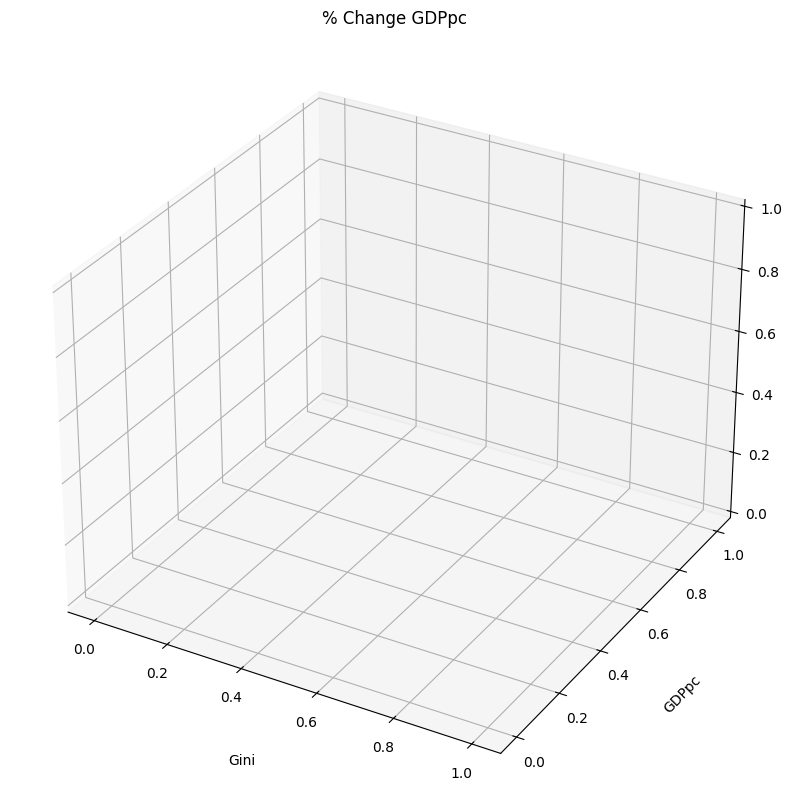

<Axes: >

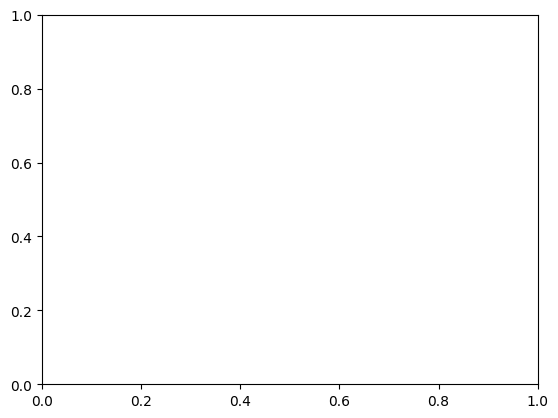

In [ ]:
temp = TGall[TGall.Country == ""]
temp = temp[['IVGinim5', "lnGDPPCm5", "lnGDPPC"]].replace(0,np.nan).dropna()
x = temp['IVGinim5']
y = temp['lnGDPPCm5']
z = temp['lnGDPPC'] - temp['lnGDPPCm5']

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()



ax.scatter(x, y, z, c = 'b')
ax.set_title('% Change GDPpc')

# Set axes label
ax.set_xlabel('Gini', labelpad=20)
ax.set_ylabel('GDPpc', labelpad=20)
ax.set_zlabel('% Change GDPpc', labelpad=20)

plt.show()

sns.lineplot(x = x, y = z)

In [ ]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n"]].replace(0,np.nan).dropna()
X.to_csv("tansferdata.csv")

In [ ]:
X = TGall[["Year", "Country", "GHDIm5","Ginim5", "lnHDI", "lnHDIm5", 'Gini2m5', 'GHDI2m5', "n"]].replace(0,np.nan).dropna()
X.to_csv("huuu.csv")

In [ ]:
X = TGall[["Year", "Country", "gini_mkt", "gini_disp", "GDPPC", "n"]].replace(0,np.nan).dropna()
X = X[X["Country"]=="Brazil"]
X[["GDPPC", "gini_mkt", "gini_disp", "n"]].describe()

,GDPPC,gini_mkt,gini_disp,n
count,58.000000,58.000000,58.000000,58.000000
mean,8780.843333,60.858621,51.318966,1.820991
std,3516.604074,2.245075,2.331136,0.690498
min,3585.000000,55.800000,46.300000,0.792263
25%,6706.250000,59.925000,50.625000,1.150962
50%,8239.500000,61.250000,51.500000,1.842507
75%,10800.893925,62.250000,52.825000,2.361764
max,15826.000000,64.200000,55.300000,3.015260


In [ ]:
len(tfp_gini["Country"].unique())

222

In [ ]:
men = TGall.replace(0,np.nan).describe()

Text(0.5, 0, 'Gini')

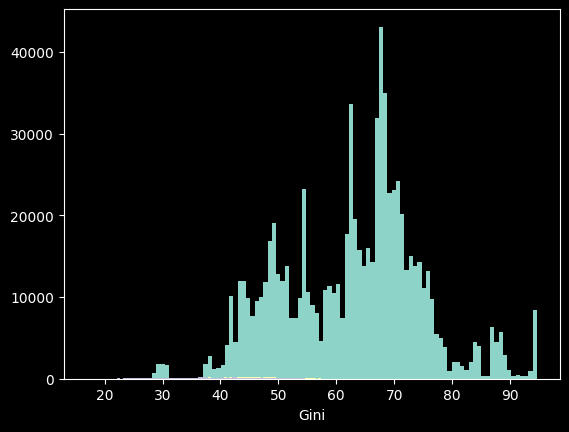

In [ ]:
wiid = TGall.WIID.replace(0,np.nan).mul(100).dropna()
gini_disp = TGall.gini_disp.replace(0,np.nan).dropna()
gini_mkt = TGall.gini_mkt.replace(0,np.nan).dropna()
plt.style.use('dark_background')

plt.hist(wiid, 100)
plt.hist(gini_mkt, 100)
plt.hist(gini_disp, 100)

plt.xlabel("Gini")

In [ ]:
cd("Serbia").tail()

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,...,-dpCTFP^2,dpCTFP^2,dpCTFP^3,dWTFP,dWTFPm1,dWTFPm2,dWTFPavg,-dWTFP^2,dWTFP^2,dWTFP^3
15327,Serbia,2017,53.757489,54.987979,100.000000,100.000000,50.4,33.1,1.04,50.4,...,-0.316588,1.095512,-1.146636,0.235772,-3.761423,-0.618899,-1.381516,0.055588,0.055588,0.013106
15328,Serbia,2018,53.174329,55.680108,101.566768,102.922392,50.2,32.8,1.10,50.2,...,-0.340075,1.202739,-1.319037,2.922392,0.235772,-3.761423,-0.201086,8.540374,8.540374,24.958321
15329,Serbia,2019,53.560597,56.793004,102.820683,106.085467,50.0,32.6,1.19,50.0,...,0.149203,0.520099,0.375085,3.163075,2.922392,0.235772,2.107080,10.005046,10.005046,31.646716
18292,Serbia,2020,NaN,NaN,NaN,NaN,49.9,32.5,1.39,49.9,...,NaN,NaN,NaN,NaN,3.163075,2.922392,NaN,NaN,NaN,NaN
18293,Serbia,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.163075,NaN,NaN,NaN,NaN


In [ ]:
tfp_giniCC = tfp_gini.dropna()
CC = TGall.dropna()

We could build a model for inequality without gdp or income

# More Variable

In [ ]:
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(tfp_gini, x_vars=['TFP', 'Gini'], 
#            y_vars='Country', size=20, aspect=.5, kind='scatter')
#plt.show()

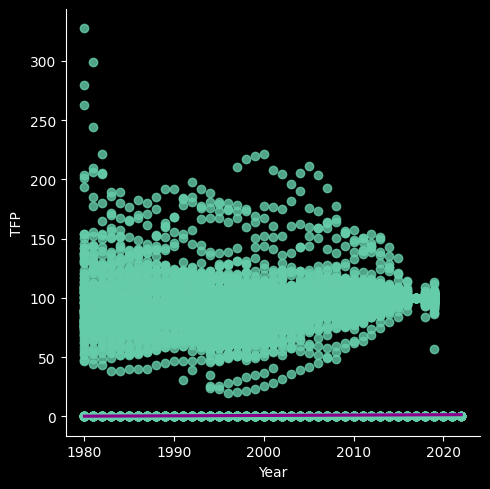

In [ ]:
sns.lmplot(data=TGall[TGall["Year"] >= 1980], x="Year", y="TFP", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'})#, size = 10)

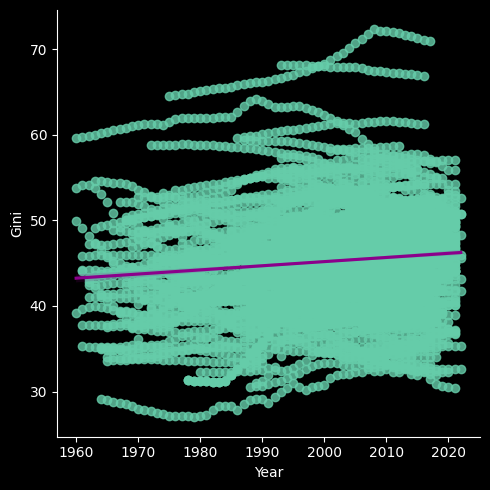

In [ ]:
sns.lmplot(data=TGC(["Gini"],Year = True), x="Year", y="Gini", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'})#, size = 10)

In [ ]:
temp = TGall[["lnGDPPC", "GDPPC"]]
temp.loc[temp["lnGDPPC"] == float('-inf')]

,lnGDPPC,GDPPC


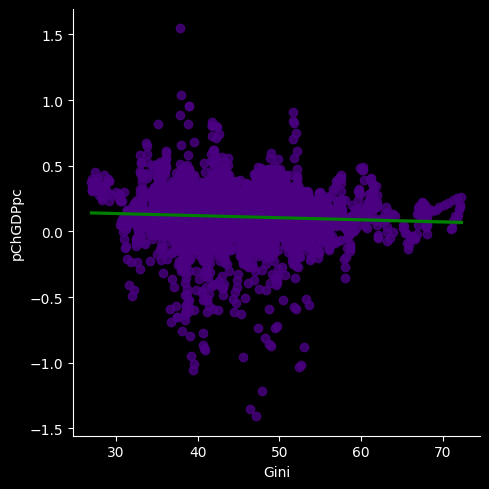

In [ ]:
#sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
edc = TGall[["lnGDPPC", "Gini", "lnGDPPCm5"]].replace(0,np.nan).dropna(axis = 0)
#edc.tail(50)
edc["pChGDPpc"] = TGall["lnGDPPC"] - TGall["lnGDPPCm5"]
edc = edc[(edc["Gini"] <= -.01) | (edc["Gini"] >= .01)]
sns.lmplot(data=edc, x="Gini", y="pChGDPpc", line_kws={'color': 'green'}, scatter_kws = {'color' : 'indigo'})#, size = 10)

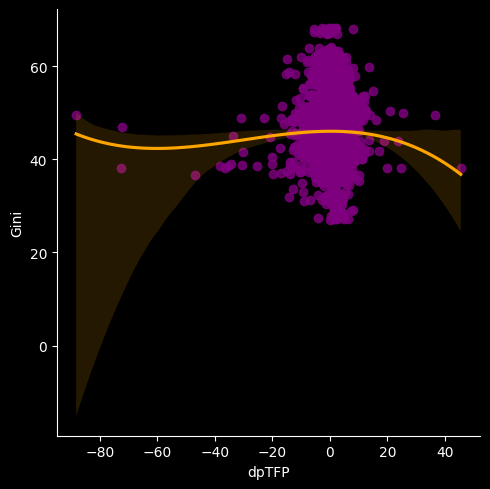

In [ ]:
sns.lmplot(data=TGC(["dpTFP", "Gini"]), x="dpTFP", y="Gini", order = 3, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

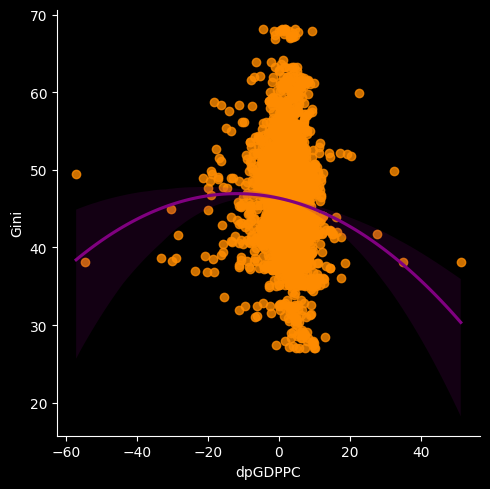

In [ ]:
sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "Gini"]), x="dpGDPPC", y="Gini", order = 2, line_kws={'color': 'purple'}, scatter_kws = {'color' : 'darkorange'})#, size = 10)

In [ ]:
TGC(["dpTFP", "lnGDPPC", "Gini"])

,dpTFP,lnGDPPC,Gini
120,1.439561,7.607697,52.2
121,2.183854,7.679013,52.2
122,11.831664,7.833074,52.2
123,0.910061,7.905415,52.2
124,6.859943,8.027574,52.2
...,...,...,...
1151240,-1.446923,7.374002,49.5
1151241,-1.824487,7.352441,49.5
1151242,-1.953656,7.335634,49.6
1151243,1.948935,7.366677,49.6


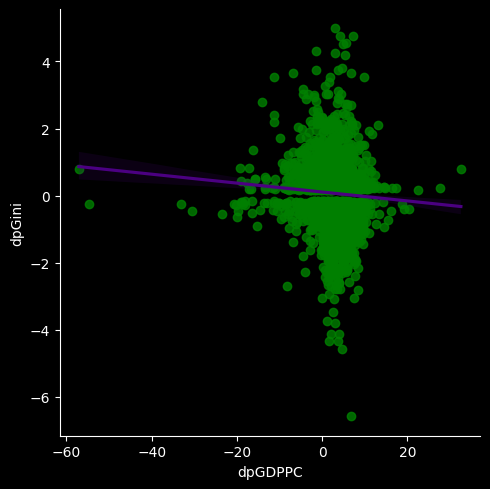

In [ ]:
sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "dpGini"]), x="dpGDPPC", y="dpGini", line_kws={'color': 'indigo'}, scatter_kws = {'color' : 'green'})#, size = 10)

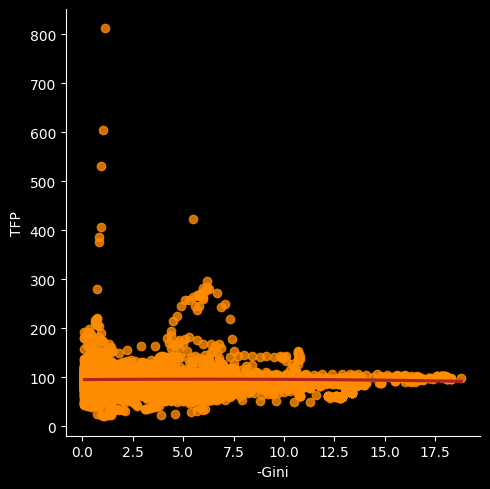

In [ ]:
sns.lmplot(data=TGC(["TFP", "-Gini"]), y="TFP", x="-Gini", order = 2, line_kws={'color': 'firebrick'}, scatter_kws = {'color' : 'darkorange'})#, size = 10)


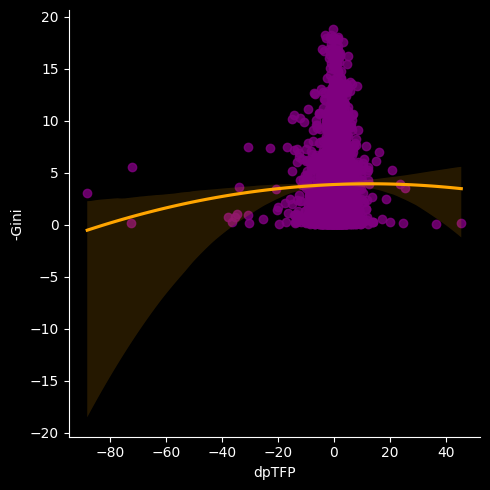

In [ ]:
sns.lmplot(data=TGC(["dpTFP", "-Gini"]), x="dpTFP", y="-Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

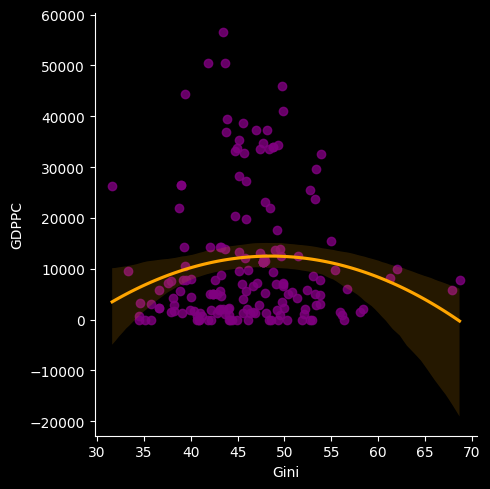

In [ ]:
sns.lmplot(data=TGall[TGall["Year"] == 2001], y="GDPPC", x="Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

In [ ]:
# sns.lmplot(data=cd(), x="TFP", y="Gini")

In [ ]:
"""
from scipy import stats
penguins = sns.load_dataset("penguins")

sns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")
"""

'\nfrom scipy import stats\npenguins = sns.load_dataset("penguins")\n\nsns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")\n'

## dTFP and dGini
https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

In [ ]:
#def r2(x, y):
#    return stats.pearsonr(x, y)[0] ** 2

# r2(CC.dgdppc, CC.dGini)

In [ ]:
#sns.regplot(data=tfp_gini, x="dTFP", y="Gini")

In [ ]:
# mmm = sns.regplot(data=tfp_gini, x="dTFP", y="dGini", order=2)

# ML Regression

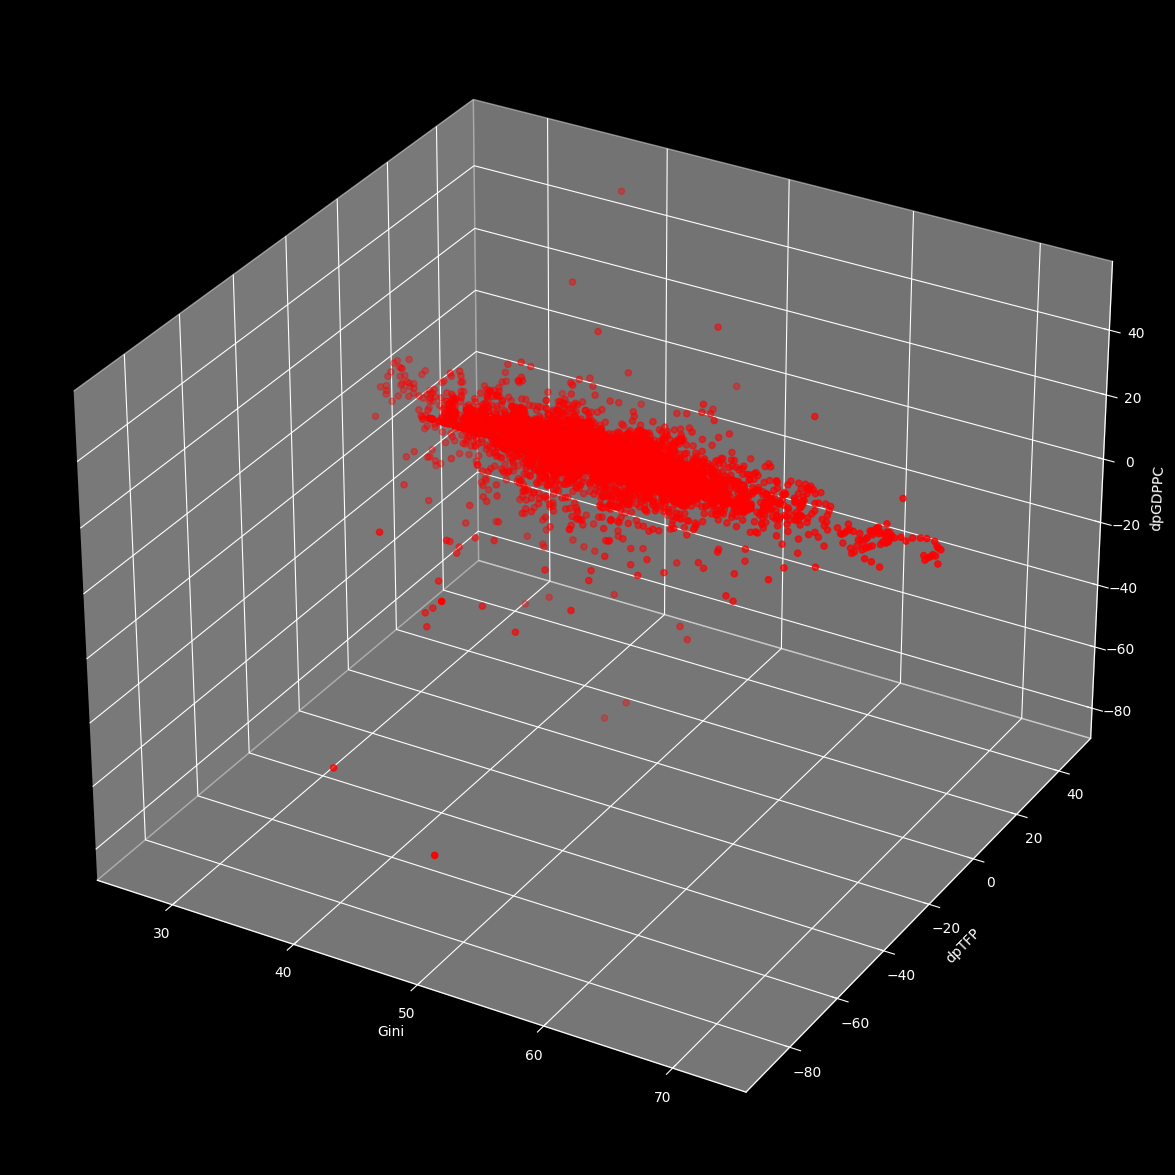

In [ ]:
from ctypes import sizeof


fig=plt.figure(figsize=(15, 15))
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(TGall["Gini"],TGall["dpTFP"],TGall["dpGDPPC"],color="red")
ax.set_xlabel("Gini")
ax.set_ylabel("dpTFP")
ax.set_zlabel("dpGDPPC")
plt.show()

In [ ]:
"""
# Predicting values:
# Function for predicting future values
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

# Checking various accuracy:
from sklearn.metrics import r2_score 
test_x = np.array(test[['dTFP']]) 
test_y = np.array(test[['dGini']]) 
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
"""

'\n# Predicting values:\n# Function for predicting future values\ndef get_regression_predictions(input_features,intercept,slope):\n    predicted_values = input_features*slope + intercept\n    return predicted_values\n\n# Checking various accuracy:\nfrom sklearn.metrics import r2_score \ntest_x = np.array(test[[\'dTFP\']]) \ntest_y = np.array(test[[\'dGini\']]) \ntest_y_ = regr.predict(test_x)\nprint("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))\nprint("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))\nprint("R2-score: %.2f" % r2_score(test_y_ , test_y) )\n'

# Machine learning 2
https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171

In [ ]:
X = tfp_giniCC[["dTFP"]]
y = tfp_giniCC["dGini"]
X.head()

,dTFP


In [ ]:
#Initiate the theta values.
theta = np.array([0]*len(X.columns))

#number of training data
m = len(X)

def hypothesis(theta, X):
    return theta*X

#Define the cost function
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [ ]:
#Predict Outputs
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)
y

Series([], Name: dGini, dtype: float64)

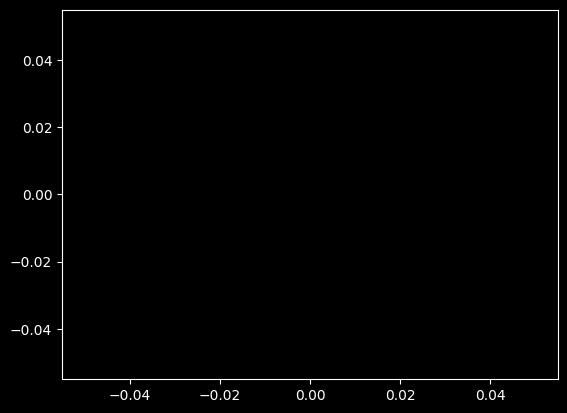

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x = list(range(0, len(y))), y= y, color='blue')         
plt.scatter(x=list(range(0, len(y))), y=y_hat, color='darkred')
plt.show()

## Simple Linear Regression

https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [ ]:
X = TGC(["lnGDPPC", "Gini"])
model = LinearRegression()
reg = model.fit(X['lnGDPPC'].values.reshape(-1, 1), X['Gini'].values.reshape(-1, 1))
y_pred = reg.predict(X['lnGDPPC'].values.reshape(-1, 1))
y_pred

array([[44.66550475],
       [44.70038451],
       [44.77573372],
       ...,
       [45.54843471],
       [45.5441425 ],
       [45.54616725]])

In [ ]:
X = TGall[["IVlnGG","IVGinim5", "lnGDPPC", "lnGDPPCm5"]].replace(0,np.nan).dropna()
X2 = sm.add_constant(X.drop(columns = ["lnGDPPC"]))
est = sm.OLS(X.lnGDPPC, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                lnGDPPC   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 7.536e+04
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:53:38   Log-Likelihood:                 1937.2
No. Observations:                4649   AIC:                            -3866.
Df Residuals:                    4645   BIC:                            -3841.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6313      0.064     25.445      0.0

In [ ]:
X

,IVlnGG,IVGinim5,lnGDPPC,lnGDPPCm5
125,416.794727,50.824879,8.218456,7.607697
126,425.619716,50.811989,8.432144,7.679013
127,435.082974,50.784142,8.661042,7.833074
128,441.756679,50.771066,8.816371,7.905415
129,444.168846,50.748985,8.866103,8.027574
...,...,...,...,...
1159240,658.473807,70.618343,9.406811,9.303571
1159241,656.988544,70.420066,9.412628,9.294042
1159242,655.128200,70.412807,9.412955,9.334203
1159243,652.651489,70.304697,9.404179,9.379070


In [ ]:
X = TGall[["IVlnGG","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5']].replace(0,np.nan).dropna()
X2 = sm.add_constant(X.drop(columns = ["lnGDPPC"]))
est = sm.OLS(X.lnGDPPC, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                lnGDPPC   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 4.582e+04
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:53:39   Log-Likelihood:                 1968.1
No. Observations:                4649   AIC:                            -3924.
Df Residuals:                    4643   BIC:                            -3885.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3892      0.104     13.410      0.0

In [ ]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n"]].replace(0,np.nan).dropna()
X = X[X.lnGDPPC > 10]
X.to_csv("tansferdata.csv")

In [ ]:
#( len(TGall['OilP'].dropna()) - len(TGall.Gini.dropna()) )/ len(TGall.Gini.dropna()) # lose 32% of data when OilP is included

In [ ]:
TGC(["IVlnGG"]).mean()

IVlnGG    393.389541
dtype: float64

In [ ]:
y = "lnGDPPC"
X = TGC(["Ginim5", "lnGGm5", "lnGDPPCm5", y], Year = True)

X2 = sm.add_constant(X.drop(columns = [y]))
est = sm.OLS(X[y], X2)
est2 = est.fit()
#print(est2.summary())
print(est2.predict())


[7.7128259  7.78553281 7.94132152 ... 9.43864326 9.48551132 9.49985927]


In [ ]:
y = "Gini"
X = TGC(["lnGDPPC", y])

X2 = sm.add_constant(X.drop(columns = [y]))
est = sm.OLS(X[y], X2)
est2 = est.fit()
#print(est2.summary())
est2.predict([50,70])

array([2081.4696672])

### Extremly predictive, dTFP on Gini

run on several years avg

Taxes, democracy, news freedom as control variable

In [ ]:
#TGall.tail().drop(columns = ["Year", "Country", ])
TGall["GDPPC"].mean()

6587.7485146150575

In [ ]:
X = TGC(["dpTFP", "dpGini", "TMITR"], Year = False, FE = False)
X2 = sm.add_constant(X.drop(columns = ["dpGini"]))
est = sm.OLS(X.dpGini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.127
Date:                Sat, 17 Feb 2024   Prob (F-statistic):             0.0173
Time:                        15:53:42   Log-Likelihood:                -363.30
No. Observations:                 241   AIC:                             732.6
Df Residuals:                     238   BIC:                             743.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7939      0.266      2.984      0.0

In [ ]:
X = TGC(["dpTFP", "dpTFP^2", "TMITR", "Gini"], Year = False)
X2 = sm.add_constant(X.drop(columns = ["Gini"]))
est = sm.OLS(X.Gini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           1.07e-48
Time:                        15:53:42   Log-Likelihood:                -768.36
No. Observations:                 286   AIC:                             1545.
Df Residuals:                     282   BIC:                             1559.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8528      0.805     74.397      0.0

In [ ]:
#Average standard deviation per gini coefficient
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["Gini"], country = x)
    std += temp["Gini"].std()

print(std / tfp_gini["Country"].unique().size)

nan


In [ ]:
tfp_gini.Gini.std()

6.4588131600951115

In [ ]:
# Avg std for dNGini
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["dNGini"], country = x)
    std += temp["dNGini"].std()

print(std / tfp_gini["Country"].unique().size)

nan


In [ ]:
X = TGC(["dCTFP", "dpCTFP^2", "Gini"])
X2 = sm.add_constant(X.drop(columns = ("Gini")))
est = sm.OLS(X["Gini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.524
Date:                Sat, 17 Feb 2024   Prob (F-statistic):             0.0296
Time:                        15:55:07   Log-Likelihood:                -13078.
No. Observations:                4073   AIC:                         2.616e+04
Df Residuals:                    4070   BIC:                         2.618e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9960      0.095    484.297      0.0

In [ ]:
X = TGC(["dpTFP", "dpGini", "GDPPC", "dGDPPC", "dpGDPPC"], FE = False, Year = True)
X2 = sm.add_constant(X.drop(columns = ("dpGini")))
est = sm.OLS(X["dpGini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     18.01
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           1.18e-17
Time:                        15:55:07   Log-Likelihood:                -4117.5
No. Observations:                3115   AIC:                             8247.
Df Residuals:                    3109   BIC:                             8283.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4799      2.461      6.697      0.0

In [ ]:
TGC(["dpTFP","GDPPC", "dpGDPPC", "dpGDPPC", "TMITR"], FE = False, Year = True).head(20)
#TGall[["dpTFP", "dpGDPPC"]].dropna()

,Year,dpTFP,GDPPC,dpGDPPC,dpGDPPC,TMITR
1141284,1955,5.710741,9240.0,9.480519,9.480519,53.0
1141285,1956,3.741735,9846.0,6.154784,6.154784,53.0
1141286,1957,2.668569,10348.0,4.851179,4.851179,53.0
1141287,1958,2.168600,10739.0,3.640935,3.640935,53.0
1141288,1959,4.823923,11440.0,6.127622,6.127622,53.0
1141289,1960,4.953004,12282.0,6.855561,6.855561,53.0
1141290,1961,1.584998,12675.0,3.100592,3.100592,53.0
1141291,1962,2.348157,13106.0,3.288570,3.288570,53.0
1141292,1963,0.656448,13367.0,1.952570,1.952570,53.0
1141293,1964,2.341571,14062.0,4.942398,4.942398,53.0


In [ ]:
X = TGC(["dpTFP", "dpTFP^2", "Gini", "dGDPPC", "dpGDPPC", "GDPPC", "TMITR"], FE = False, Year = True)
X2 = sm.add_constant(X.drop(columns = ("Gini")))
est = sm.OLS(X["Gini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     74.76
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           3.06e-60
Time:                        15:55:09   Log-Likelihood:                -731.33
No. Observations:                 286   AIC:                             1479.
Df Residuals:                     278   BIC:                             1508.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -195.3787     51.306     -3.808      0.0

In [ ]:
TGC(["dpTFP", "dpTFP^2", "Gini", "dpGDPPC"], FE = False, Year = True)

,Year,dpTFP,dpTFP^2,Gini,dpGDPPC
120,2000,1.439561,2.072335,52.2,5.672375
121,2001,2.183854,4.769220,52.2,6.883229
122,2002,11.831664,139.988262,52.2,14.277992
123,2003,0.910061,0.828211,52.2,6.978665
124,2004,6.859943,47.058818,52.2,11.499218
...,...,...,...,...,...
1151240,2014,-1.446923,2.093587,49.5,-0.627353
1151241,2015,-1.824487,3.328752,49.5,-2.179487
1151242,2016,-1.953656,3.816770,49.6,-1.694915
1151243,2017,1.948935,3.798347,49.6,3.056574


## Ridge Regression

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [ ]:
TGall.columns

Index(['Country', 'Year', 'CTFP', 'CWTFP', 'TFP', 'WTFP', 'Gini', 'gini_disp',
       'gini_disp_se', 'gini_mkt', 'gini_mkt_se', 'abs_red', 'abs_red_se',
       'rel_red', 'rel_red_se', 'WIID', '-Gini', 'dGini', 'd5Gini', 'dpGini',
       'd5pGini', 'dNGini', 'dpGinim5', 'Ginim5', 'dTFP', 'dpTFP', 'dpTFPm1',
       'dpTFPm2', 'dpTFPavg', '-dpTFP^2', 'dpTFP^2', 'dpTFP^3', 'log(dpTFP)',
       'dCTFP', 'dpCTFP', 'dCTFPm1', 'dCTFPm2', 'dCTFPavg', '-dpCTFP^2',
       'dpCTFP^2', 'dpCTFP^3', 'dWTFP', 'dWTFPm1', 'dWTFPm2', 'dWTFPavg',
       '-dWTFP^2', 'dWTFP^2', 'dWTFP^3', 'GDPPC', 'dGDPPC', 'd5GDPPC',
       'dpGDPPC', 'd5pGDPPC', 'dpGDPPC^2', 'lnGDPPC', 'Gini2m5', 'lnGG',
       'lnGGm5', 'lnGDPPCm5', 'TWWI', 'TMITR', 'Oil', 'OilW', 'Price', 'lnP',
       'OilP', 'OlnP', 'IVGini', 'IVGinim5', 'IVlnGG', 'IVlnGGm5', 'IVGini2m5',
       'IVlnGG2m5', 'iso3', 'hdicode', 'region', 'HDI', 'Country Code', 'GNI',
       'lnHDI', 'lnHDIm5', 'GHDIm5', 'GHDI2m5', 'TMITR2', 'n'],
      dtype='object'

In [ ]:
rdf = TGall[["Year", "Country", "IVGinim5", "IVGini2m5", "lnGDPPC", "lnGDPPCm5", "abs_red", "n"]].replace(0,np.nan).dropna().reset_index(drop=True)
len(rdf.Country.unique())

151

In [ ]:
#interaction variables
irdf = rdf.drop(["lnGDPPC", "Year", "Country"], axis = 1)

variables = irdf.columns
df_interaction = irdf
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        df_interaction[f'{variables[i]}*{variables[j]}'] = irdf[variables[i]] * irdf[variables[j]]
        
irdf = pd.concat([rdf[["Country", "lnGDPPC", "Year"]], df_interaction], axis=1).drop(["IVGinim5*IVGini2m5"], axis = 1)
irdf = pd.get_dummies(irdf, columns=['Country'], prefix='', prefix_sep='')
irdf["Intercept"] = 1
irdf

,lnGDPPC,Year,IVGinim5,IVGini2m5,lnGDPPCm5,abs_red,n,IVGinim5*lnGDPPCm5,IVGinim5*abs_red,IVGinim5*n,...,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Intercept
0,8.218456,2005,50.824879,2583.168345,7.607697,2.5,3.557659,386.660302,127.062198,180.817588,...,0,0,0,0,0,0,0,0,0,1
1,8.432144,2006,50.811989,2581.858182,7.679013,2.5,3.592013,390.185936,127.029971,182.517339,...,0,0,0,0,0,0,0,0,0,1
2,8.661042,2007,50.784142,2579.029030,7.833074,2.5,3.639589,397.795933,126.960354,184.833418,...,0,0,0,0,0,0,0,0,0,1
3,8.816371,2008,50.771066,2577.701097,7.905415,2.6,3.670909,401.366354,132.004770,186.375972,...,0,0,0,0,0,0,0,0,0,1
4,8.866103,2009,50.748985,2575.459465,8.027574,2.6,3.693482,407.391232,131.947361,187.440486,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,9.406811,2013,70.618343,4986.950438,9.303571,8.8,1.361621,657.002760,621.441423,96.155427,...,0,0,0,0,0,0,0,0,0,1
4591,9.412628,2014,70.420066,4958.985672,9.294042,8.7,1.576294,654.487063,612.654573,111.002743,...,0,0,0,0,0,0,0,0,0,1
4592,9.412955,2015,70.412807,4957.963333,9.334203,8.7,2.074017,657.247435,612.591417,146.037348,...,0,0,0,0,0,0,0,0,0,1
4593,9.404179,2016,70.304697,4942.750383,9.379070,8.6,0.972004,659.392670,604.620392,68.336445,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(irdf.drop('lnGDPPC', axis=1))
y = irdf['lnGDPPC'].values

ridge = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=10)
ridge.fit(X, y)

feature_names = list(irdf.drop('lnGDPPC', axis=1).columns)
ridge_coeff_df = pd.DataFrame(ridge.coef_, index=feature_names, columns=['Coefficient'])

ridge_coeff_df.head(30)

,Coefficient
Year,0.114102
IVGinim5,-0.064967
IVGini2m5,-0.082498
lnGDPPCm5,0.482028
abs_red,0.049071
n,-0.015925
IVGinim5*lnGDPPCm5,0.214423
IVGinim5*abs_red,0.006852
IVGinim5*n,-0.022640
IVGini2m5*lnGDPPCm5,0.053847


In [ ]:
X_df = pd.DataFrame(X, columns = irdf.drop('lnGDPPC', axis=1).columns)
X_df.columns[0:20]

Index(['Year', 'IVGinim5', 'IVGini2m5', 'lnGDPPCm5', 'abs_red', 'n',
       'IVGinim5*lnGDPPCm5', 'IVGinim5*abs_red', 'IVGinim5*n',
       'IVGini2m5*lnGDPPCm5', 'IVGini2m5*abs_red', 'IVGini2m5*n',
       'lnGDPPCm5*abs_red', 'lnGDPPCm5*n', 'abs_red*n', 'Afghanistan',
       'Albania', 'Algeria', 'Angola', 'Argentina'],
      dtype='object')

In [ ]:
print(X_df.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].values[0][2])
print(scaler.transform(irdf.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].drop('lnGDPPC', axis = 1).values)[0][2])
#print(irdf.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].values[0])

0.20445549484596598
0.20445549484596598


c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction = ridge.predict((scaler.transform(irdf.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].drop('lnGDPPC', axis = 1).values)).reshape(1, -1))
print(prediction)

[10.88558579]


c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
def mlCo(Country):
    df = irdf[(irdf.Year ==  2018) & (irdf[Country] == 1)].drop('lnGDPPC', axis = 1)
    pred = pd.DataFrame(columns=["Gini", "pred"])
    
    ## have to edit all vectors that are multiplied by Gini
    for i in range(1,101):
        g = df.IVGinim5.values[0]
        for r in df.columns:
            if "IVGini2m5" in r:
                df[r] = df[r].div(g**2).mul(i**2)
            elif "IVGinim5" in r:
                df[r] = df[r].div(g).mul(i)
        
        tdf = scaler.transform(df.values.reshape(1, -1))
        pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignore_index = True)
    return pred
        

c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_9864\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignore_index = True)
c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_9864\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignor

c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_9864\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignore_index = True)
c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_9864\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignor

<Axes: xlabel='Gini', ylabel='pred'>

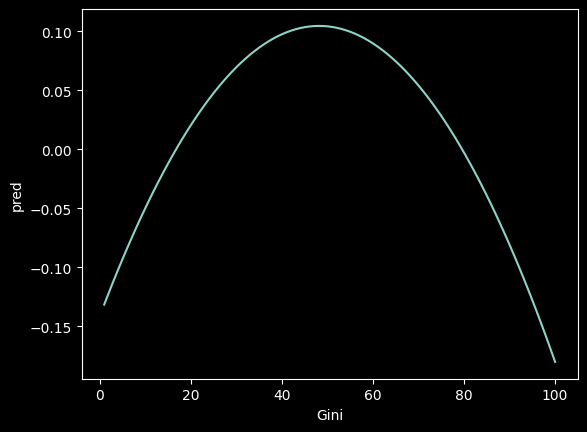

In [ ]:
fake = mlCo("Benin")
sns.lineplot(x = "Gini", y = "pred", data = fake)